# Explore here

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

## Paso 1: Carga del conjunto de datos

In [56]:
# Cargar conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
# Seleccionar solo las columnas necesarias
df = df[['Latitude', 'Longitude', 'MedInc']]

In [58]:
# División en train y test
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [59]:
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [60]:
X_train.shape

(16512, 3)

## Paso 2: Construye un K-Means

In [61]:
# Entrenar modelo K-Means con 6 clusters
modelo = KMeans(n_clusters=6, random_state=42)
X_train_copy = X_train.copy() # copia del conjunto de entrenamiento para no modificar el original (X_train)
X_train_copy['cluster'] = modelo.fit_predict(X_train)

In [62]:
# Verificar los valores únicos del cluster
X_train_copy['cluster'].unique()

array([3, 1, 5, 0, 2, 4], dtype=int32)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

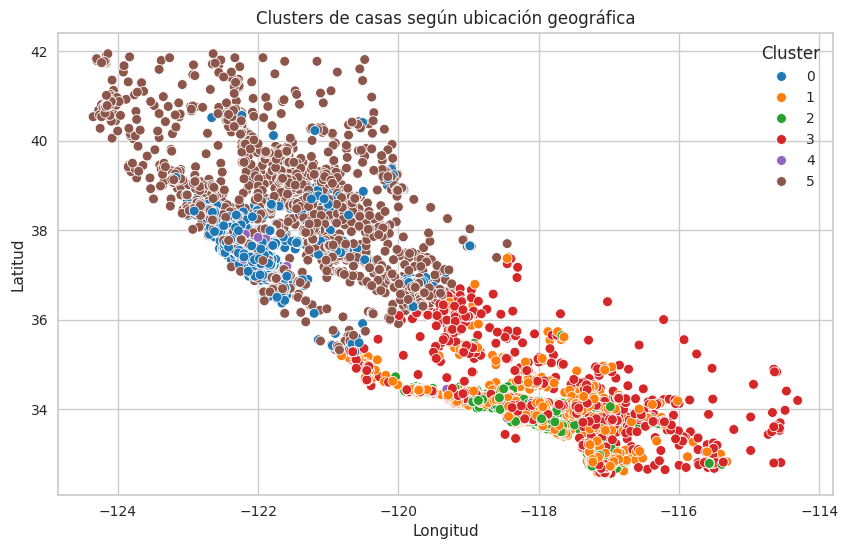

In [63]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_copy, x='Longitude', y='Latitude', hue='cluster', palette='tab10', s=50)
plt.title('Clusters de casas según ubicación geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Interpretación del grafico
- Los clusters 5 y 0 están superpuestos en la parte superior izquierda, lo cual sugiere que hay zonas geográficas muy parecidas en esa región.
- Los clusters 1 y 3 están muy dispersos en el centro y parte inferior derecha. Esto podría indicar que esos clusters abarcan una gran zona sin una forma clara.
- Cluster 2 y 4 casi no se ve, lo que puede significar que tiene muy pocos puntos asignados o es un cluster pequeño.

In [64]:
X_train_copy['cluster'].value_counts().sort_index()

cluster
0    2455
1    3807
2    1280
3    4368
4     246
5    4356
Name: count, dtype: int64

## Paso 3: Predice con el conjunto de test

In [65]:
# Predecir los clusters del conjunto de test
X_test_copy = X_test.copy()
X_test_copy['cluster'] = modelo.predict(X_test)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

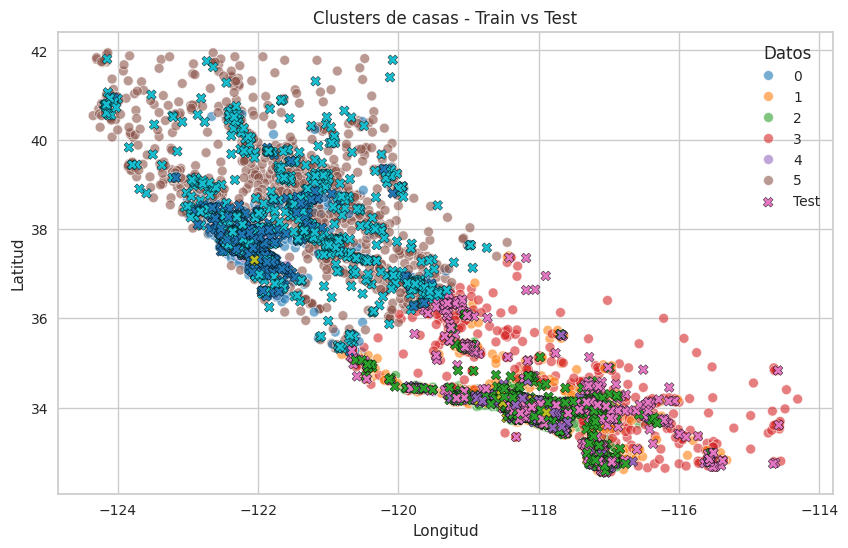

In [66]:
# Visualizar los clusters de train y test en el mismo gráfico
plt.figure(figsize=(10, 6))

# Train: puntos ya clasificados
sns.scatterplot(
    data=X_train_copy, x='Longitude', y='Latitude',
    hue='cluster', palette='tab10', s=50, alpha=0.6
)

# Test: puntos nuevos predichos
plt.scatter(
    X_test_copy['Longitude'], X_test_copy['Latitude'],
    c=X_test_copy['cluster'], cmap='tab10', edgecolor='black',
    s=50, marker='X', label='Test'
)

plt.title('Clusters de casas - Train vs Test')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Datos')
plt.grid(True)
plt.show()

### Interpretación del gráfico (Train vs Test)
- Los puntos de test (en forma de X) siguen un patrón similar al de los datos de entrenamiento.
- En la parte superior izquierda, los clusters 0 y 5 aparecen nuevamente mezclados, tanto en el train como en el test, lo que refuerza la idea de que podrían representar una única región geográfica con características similares.
- En la parte inferior derecha, los clusters 1, 2, 3 y 4 están muy dispersos. Las predicciones de test también se reparten en esa zona, lo que sugiere que los datos nuevos comparten patrones con los del entrenamiento.

**Conclusión:** El modelo K-Means parece generalizar bien, ya que los puntos del conjunto de test siguen patrones similares a los del entrenamiento. Sin embargo, la superposición entre algunos clusters y la dispersión en ciertas zonas sugiere que la segmentación podría mejorarse.

## Revisar el número óptimo de clusters (K) y reentrenar el modelo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

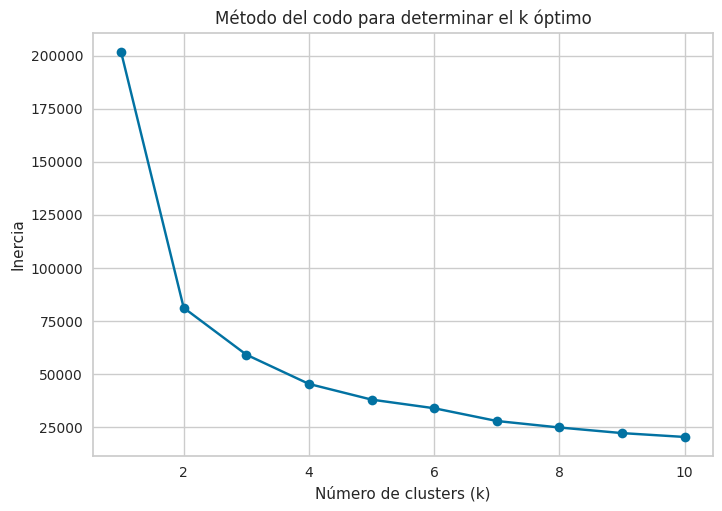

In [67]:
# Implementación del método del codo para identificar el número óptimo de clústeres

inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)  # Inertia = suma de distancias al centroide

# Graficar
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el k óptimo')
plt.grid(True)
plt.show()

In [68]:
# Entrenar K-Means con n_clusters=3
modelo_k3 = KMeans(n_clusters=3, random_state=42)
X_train_copy['cluster'] = modelo_k3.fit_predict(X_train)

In [69]:
# Predice test
X_test_copy['cluster'] = modelo_k3.predict(X_test)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

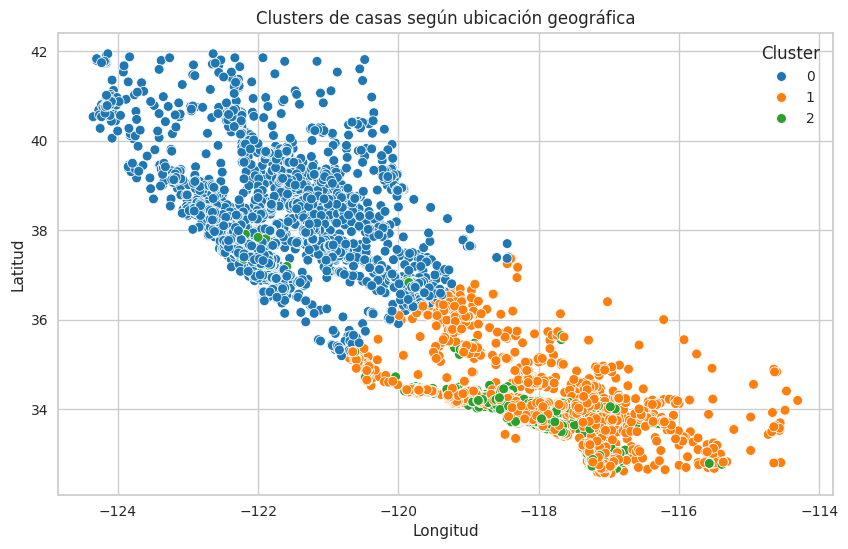

In [70]:
# Graficar los clusters = 3
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_copy, x='Longitude', y='Latitude', hue='cluster', palette='tab10', s=50)
plt.title('Clusters de casas según ubicación geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

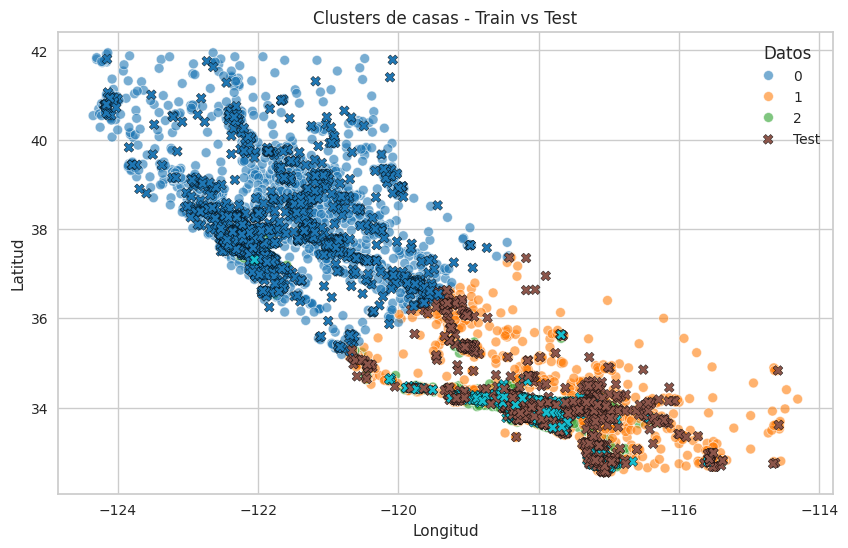

In [71]:
# Visualizar los clusters de train y test en el mismo gráfico
plt.figure(figsize=(10, 6))

# Train: puntos ya clasificados
sns.scatterplot(
    data=X_train_copy, x='Longitude', y='Latitude',
    hue='cluster', palette='tab10', s=50, alpha=0.6
)

# Test: puntos nuevos predichos
plt.scatter(
    X_test_copy['Longitude'], X_test_copy['Latitude'],
    c=X_test_copy['cluster'], cmap='tab10', edgecolor='black',
    s=50, marker='X', label='Test'
)

plt.title('Clusters de casas - Train vs Test')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Datos')
plt.grid(True)
plt.show()

### Interpretación del gráfico (K = 3)
- Al reducir el número de clusters a 3, las zonas geográficas estan mejor definidas.
- El cluster 2 aparece más disperso que los otros, lo que podría reflejar una zona más heterogénea en características.
- Los puntos del conjunto de test (en forma de X) siguen una distribución similar con los clusters del entrenamiento.
- En general, la segmentación parece más estable  en comparación con la versión anterior con 6 clusters.

## Paso 4: Entrena un modelo de clasificación supervisada

He elegido el modelo **Random Forest** porque es un modelo fácil de aplicar, funciona bien con números y además es bueno captando patrones.

In [72]:
# Seleccionar las variables predictoras 
X_train_rf = X_train_copy[['Latitude', 'Longitude', 'MedInc']]
y_train_rf = X_train_copy['cluster']

X_test_rf = X_test_copy[['Latitude', 'Longitude', 'MedInc']]
y_test_rf = X_test_copy['cluster']

In [73]:
# Crear el modelo
clf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train_rf, y_train_rf)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
# Predicir test
y_pred = clf.predict(X_test_rf)

In [75]:
# Ver métricas
print("=== Reporte de Clasificación ===")
print(classification_report(y_test_rf, y_pred))

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1662
           1       1.00      1.00      1.00      1997
           2       0.99      1.00      0.99       469

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

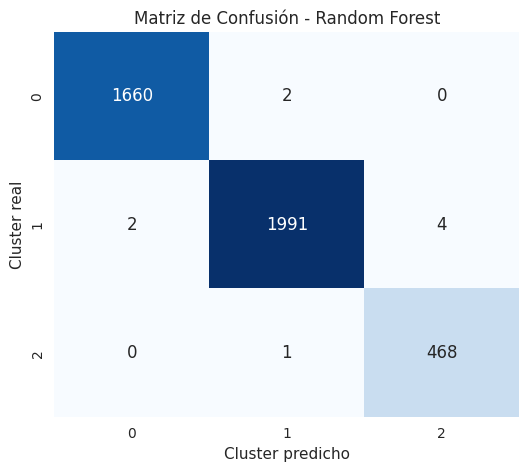

In [76]:
# Matriz de confusión
cm = confusion_matrix(y_test_rf, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

plt.xlabel('Cluster predicho')
plt.ylabel('Cluster real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

### Análisis de Resultados
- El modelo Random Forest alcanza una precisión y recall casi perfectos en la clasificación de los clusters.

- El porcentaje de error es bajo, con solo 9 errores. 

- El flujo de trabajo de usar clustering para etiquetar y luego entrenar un modelo supervisado ha demostrado ser muy efectivo para clasificar nuevas casas según sus características.

## Paso 5: Guarda los modelos

In [77]:
# Carpeta donde guardar los modelos
folder = 'models' 

# Guardar modelo K-Means (con 3 clusters)
joblib.dump(modelo_k3, folder + 'kmeans_model.pkl')

# Guardar modelo Random Forest
joblib.dump(clf, folder + 'random_forest_model.pkl')

['modelsrandom_forest_model.pkl']